C:\Users\gaura\AppData\Local\Temp\ipykernel_22052\3244520268.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_trends = df.resample('M', on='order_date')['sales'].sum()


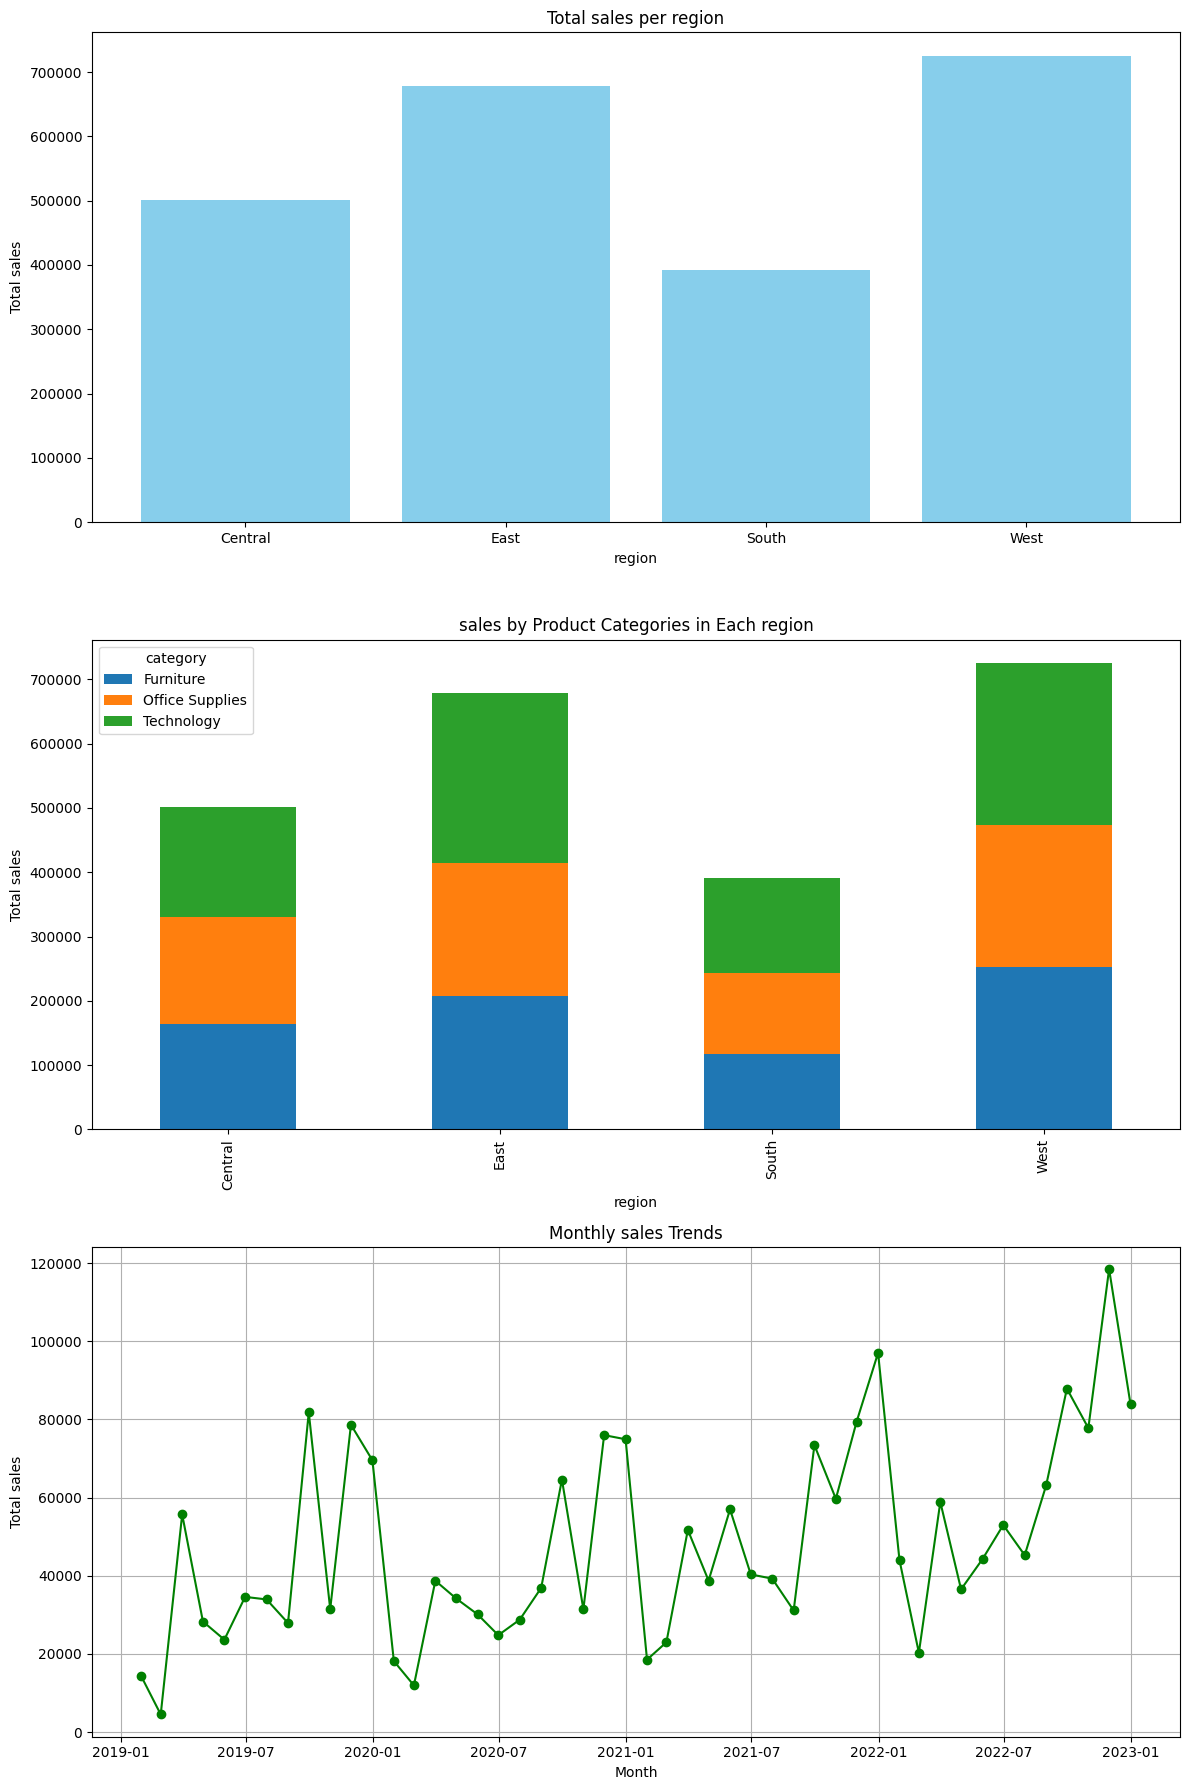

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('salse data.csv', parse_dates=['order_date'])

# Ensure correct column names (if needed)
df.columns = [col.strip() for col in df.columns]

# Prepare data for the plots
# Total sales per region
total_sales_per_region = df.groupby('region')['sales'].sum()

# sales by product categories in each region
sales_by_category_region = df.groupby(['region', 'category'])['sales'].sum().unstack()

# Monthly sales trends
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales_trends = df.resample('ME', on='order_date')['sales'].sum()

# Create the dashboard
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Bar chart: Total sales per region
axes[0].bar(total_sales_per_region.index, total_sales_per_region.values, color='skyblue')
axes[0].set_title('Total sales per region')
axes[0].set_xlabel('region')
axes[0].set_ylabel('Total sales')

# Stacked bar chart: sales by product categories in each region
sales_by_category_region.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('sales by Product Categories in Each region')
axes[1].set_xlabel('region')
axes[1].set_ylabel('Total sales')
axes[1].legend(title='category')

# Line plot: Monthly sales trends
axes[2].plot(monthly_sales_trends.index, monthly_sales_trends.values, marker='o', linestyle='-', color='green')
axes[2].set_title('Monthly sales Trends')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total sales')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()